# Lab 9 Partial Differential Equations: Laplace and Poisson Equation

In [1]:
import numpy as np

def initialize_grid(L, V1, V2):
    grid = np.zeros((L, L))  # 100x100 grid initialized to 0V
    plate_length = 6  # Length of the plates
    side_margin = (L - plate_length) // 2  # Margin from the sides to the plates
    
    # Setting up the plates
    grid[side_margin:side_margin+plate_length, side_margin] = V1  # Plate at +1V
    grid[side_margin:side_margin+plate_length, side_margin+plate_length+2] = V2  # Plate at -1V
    
    return grid


In [2]:
def solve_laplace(grid, tolerance=1e-6):
    L = len(grid)
    delta = 1.0  # Maximum change in potential in any step, initially large
    
    while delta > tolerance:
        delta = 0
        for i in range(1, L-1):  # Avoid edges which are boundary conditions
            for j in range(1, L-1):
                if not (2 <= i <= 7 and (j == 2 or j == 8)):  # Exclude the plates
                    new_val = (grid[i+1, j] + grid[i-1, j] + grid[i, j+1] + grid[i, j-1]) / 4
                    delta = max(delta, abs(new_val - grid[i, j]))
                    grid[i, j] = new_val
    return grid


In [3]:
import matplotlib.pyplot as plt

def plot_potential(grid):
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap='hot', interpolation='nearest', extent=(0, 10, 0, 10))
    plt.colorbar(label='Potential (V)')
    plt.title('Electrostatic Potential in a Capacitor')
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.show()


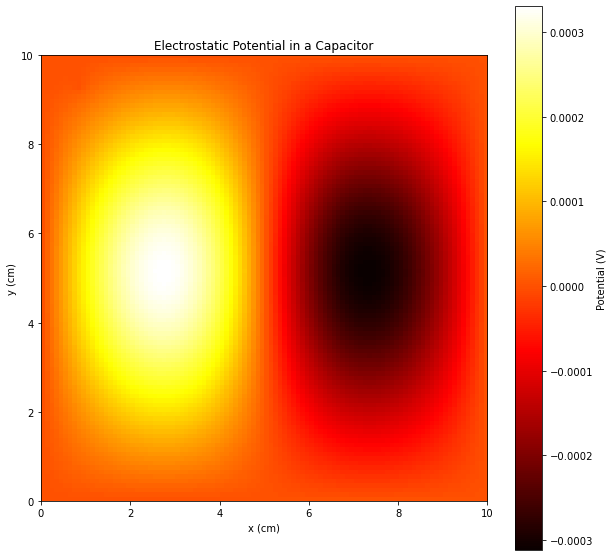

In [4]:
# Constants
L = 100  # Grid size
V1 = 1.0  # Voltage at one plate
V2 = -1.0  # Voltage at the opposite plate

# Initialize the grid and solve Laplace's equation
grid = initialize_grid(L, V1, V2)
solved_grid = solve_laplace(grid)

# Plot the potential distribution
plot_potential(solved_grid)
